# 2D Filters
Exploring 2D filtering techniques.

In [1]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Spacial Domain Methods
Given an image **I**, we can perform a transformation: $g(x,y)= T[I(x,y)]$.  

### Point Processing Methods
Each pixel on the input image is mapped to a corresponding pixel on the output image by applying a function (one-to-one mapping). 
Examples of point processing methods include:  
- Histogram Equalization
- Negative
- Thresholding

### Area Processing Methods
Transformation *T* operates on a neighbourhood of pixels. 
This essentially means not only the pixel to be mapped is considered, but also its surrounding pixels.  
For area processing methods, we often need to specify 2 important properties:  
1. Area and shape of neighbourhood to considered (typically a rectangular mask is used)  
2. Operation to perform (often a linear combination of pixel values)

#### Correlation and Convolution Filtering
Given an image **I** and a mask $H \in \mathbb{R}^{{n+1}\times{m+1}}$
- **Correlation** is a measure of similarity between 2 sequences: 
$$
G(x,y)= \frac{1}{(n+1)\times(m+1)} \sum^{\frac{n}{2}}_{i= -\frac{n}{2}} \sum^{\frac{m}{2}}_{j= -\frac{m}{2}} I(x+i, y+j)
$$
- For generalization, such that individual pixel weights can be dictated according to the filtering mask, **Cross Correlation**, $G= I \otimes H $ is often used: 
$$
G(x,y) =  \sum^{\frac{n}{2}}_{i= -\frac{n}{2}} \sum^{\frac{m}{2}}_{j= -\frac{m}{2}}  H(i,j) I(x+i, y+j)
$$
- **Convolution** is quite similar to correlation but with a subtle twist, the mask is flipped both horizontally and vertically. i.e. $G= I \star H $:
$$
G(x,y)= \sum^{\frac{n}{2}}_{i= -\frac{n}{2}} \sum^{\frac{m}{2}}_{j= -\frac{m}{2}}  H(i,j) I(x-i, y-j)
$$
Convolution has the convenience factor that if a mask is applied on a neighbourhood with a 1-valued central pixel (i.e. $I(0,0)=1$), the neighbourhood maps to the filter itself.  
Illustration: Given an image 
$
I= \begin{bmatrix}
 0& 0 & 0\\ 
 0&  1& 0\\ 
 0&  0& 0
\end{bmatrix}
$ 
and a filter 
$
H= \begin{bmatrix}
 a&  b& c\\ 
 d&  e& f\\ 
 g&  h& i
\end{bmatrix}
$
then 
$
I \star H= \begin{bmatrix}
 a&  b& c\\ 
 d&  e& f\\ 
 g&  h& i
\end{bmatrix}
$


### Image Correlation and Template Matching
For template matching, Zero-mean normalized cross-corellation is often used.

#### Illustration: Find a patch of pixels in an image.
**Template to find: ** ![template](../data/raw/img/04.jpg)   

In [51]:
# Read image as color image
img= cv2.imread('../data/raw/2D/03.jpeg', 1)

In [52]:
# Read template image
temp= cv2.imread('../data/raw/2D/04.jpg', 1)
# Get template size
h,w= temp.shape[:2]

In [53]:
# Perform template matching using "Normalized Cross Correlation"
result= cv2.matchTemplate(img, temp, method=cv2.TM_CCORR_NORMED)

In [54]:
# Get mins and maxes
min_val, max_val, min_coord, max_coord= cv2.minMaxLoc(result)

In [55]:
# Select max point coordinates as top left corner of template position on image
top_left= max_coord
# Compute bottom right corner
bot_right= (top_left[0]+w, top_left[1]+h)

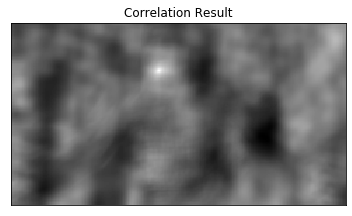

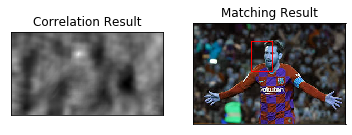

In [56]:
# Draw a rectangle on predicted template location on image
cv2.rectangle(img, top_left, bot_right, 255)

# Plotting
# Correlation result
plt.imshow(result, cmap='gray')
plt.title("Correlation Result")
plt.xticks([]),plt.yticks([])
plt.savefig('../data/processed/2D/matching/correlation.png')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')
plt.title("Correlation Result")
plt.xticks([]),plt.yticks([])
# Image with rectangle
# Save image
cv2.imwrite('../data/processed/2D/matching/matching.png', img)
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Matching Result')
plt.xticks([]),plt.yticks([])

plt.savefig('../data/processed/2D/matching/matchingPlot.png')

plt.show()

### Image Smoothing and Image Filtering
In this section, box (average), and gaussian filters are used for image smoothening.

In [57]:
# Read Image
img= cv2.imread('../data/raw/2D/01.png', 0)

In [58]:
# Filter dimension
filt_size= (5,5)

Box (Average) Filter

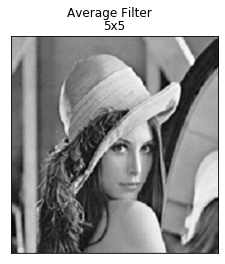

In [60]:
# Average(Box) Filtering
smooth_img= cv2.boxFilter(img, -1, filt_size)

plt.plot()
plt.imshow(smooth_img, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("{0}x{1}".format(*filt_size))
    
plt.suptitle('Average Filter')
plt.savefig('../data/processed/2D/smoothing/average_filters.png')

Gaussian Filters  
We examine gaussian filters with different standard deviations.

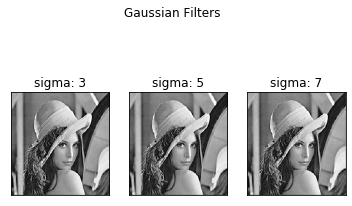

In [62]:
# Gaussian Filtering

sigma_list= [3, 5, 7]
plt.figure()

for idx,sigma in enumerate(sigma_list,0):
    
    gauss_smooth_img= cv2.GaussianBlur(img, filt_size, sigma)
    
    tag= "sigma: {0}".format(sigma)
    
    plt.subplot(1,3,(idx+1))
    plt.imshow(gauss_smooth_img, cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.title(tag)
    
plt.suptitle('Gaussian Filters')
plt.savefig('../data/processed/2D/smoothing/gaussian_filters.png')

### Image Noises and Image Sharpening
Here, 3 different noise types (salt & pepper noise, impulse noise, & gauss noise) are added to an image and different filters are applied.

In [63]:
# Read Image as array of shape (NxD)
img= cv2.imread('../data/raw/2D/01.png', 0)
N,D= img.shape

Noises

In [64]:
# Noise size- Number of noise pixels
noise_size= (N*D)//100   
# Noise indices
# Limit x axis indices to N
noise_x= np.random.randint(0,N,noise_size)
# Limit y axis indices to D
noise_y= np.random.randint(0,D,noise_size)

Noise Generating Functions

In [65]:
# Salt and Pepper Noise
def salt_and_pepper_noise(img, noise_x, noise_y, noise_size):
    """
    Adds salt and pepper noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels
    """
    # White pixels
    img[noise_x[:noise_size//2], noise_y[:noise_size//2]]= 255
    # Black pixels
    img[noise_x[noise_size//2:], noise_y[noise_size//2:]]= 0

# Impulse Noise
def impulse_noise(img, noise_x, noise_y, noise_size):
    """
    Adds impulse noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels

    """
    # White pixels
    img[noise_x, noise_y]= 255
    
# Gausian Noise
def gauss_noise(img, noise_x, noise_y, noise_size):
    """
    Adds gaussian noise to img.
    int noise_x, noise_y: image coordinates to add noise
    int noise_size: number of noise pixels
    """
    img_mean= np.mean(img)
    sigma= 10
    # Gaussian pixels
    gauss_pix= np.random.normal(img_mean,sigma,noise_size)
    img[noise_x, noise_y]= gauss_pix

The following filters are applied one after the other on the noise-corrupted images:
- Box
- Gaussian
- Median

In [66]:
# Noise list
noise_list= ['salt_and_pepper_noise', 'impulse_noise', 'gauss_noise']
# Filter size
filt_size= (7,7)

for idx,noise in enumerate(noise_list,0):
    # Make fresh image copy
    img_cpy= img.copy()
    # Add noise
    eval(noise)(img_cpy, noise_x, noise_y, noise_size)
    # Save image
    cv2.imwrite('../data/processed/2D/filtering/spacial/noisy/'+noise+'.png', img_cpy)
    
    # Smoothing
    # Average Filter
    img_filt= cv2.boxFilter(img_cpy, -1, filt_size)
    # Save image
    cv2.imwrite('../data/processed/2D/filtering/spacial/filtered/'+noise+'_average.png', img_filt)
    # Gaussian Filter
    img_filt= cv2.GaussianBlur(img_cpy, filt_size, filt_size[0]/5)
    # Save image
    cv2.imwrite('../data/processed/2D/filtering/spacial/filtered/'+noise+'_gaussian.png', img_filt)
    # Median Filter
    img_filt= cv2.medianBlur(img_cpy, filt_size[0])
    # Save image
    cv2.imwrite('../data/processed/2D/filtering/spacial/filtered/'+noise+'_median.png', img_filt)

#### Image Sharpening
Given an image $I$ and a smoothed version of the same image $I_{s}$, we can obtain a sharpened image $I_{sharp}$ by computing:  
$$
I_{sharp}(x,y)= I(x,y) + k \times (I(x,y) - I_{s}(x,y))
$$
where $k$ is a scaling constant which should be $>2.5$ 

In [67]:
# Blur the image
img_blur= cv2.GaussianBlur(img, filt_size, filt_size[0]/3)

In [68]:
# Extract details
# For some reason "img-img_blur" gives some funny results because of overflow into negative values
# Opencv subtract function uses the 'saturate:= max(min(round(num),0),255)' cast to keep values with the range (0,255)
# Residue
img_res= cv2.subtract(img, img_blur)

Text(0.5, 1.0, 'Image Sharpening')

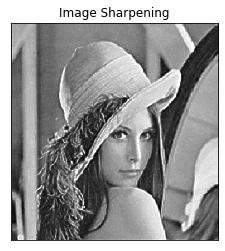

In [69]:
# Obtain sharpened image by applying High Boost (i.e. Scaling the residue by 2.5 then adding to the original image)
img_sharp= cv2.addWeighted(img, 1, img_res, 2.5, 0)

cv2.imwrite('../data/processed/2D/filtering/spacial/filtered/sharpened.png',img_sharp)
plt.imshow(img_sharp, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("Image Sharpening")

## Frequency Domain Methods
Given an image **I**, we can transform such image into the frequency domain and then apply some processing methods. 
The result is then transformed back into the spacial domain for visualization.  

The Fourier Transform helps us transform images from spacial to frequency domain.  

### Fourier Transform and Magnitude Spectrum

In [70]:
# Read image
img= cv2.imread('../data/raw/2D/05.png', 0)

Compute Fast Fourier Transform

In [72]:
# Convert image to np.float32 and compute its FFT
dfft= cv2.dft(np.float32(img), flags= cv2.DFT_COMPLEX_OUTPUT)
# Shift the result to make it zero centred
dfft_centered= np.fft.fftshift(dfft)

Compute Magnitude Spectrum

In [73]:
# Compute the magnitude spectrum
mag_spec= 20*np.log(cv2.magnitude(dfft_centered[:,:,0], dfft_centered[:,:,1]))

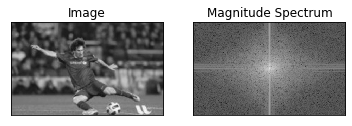

In [74]:
# Plots
# Plot image
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.xticks([]), plt.yticks([])
# Plot Magnitude Spectrum
plt.subplot(1,2,2)
plt.imshow(mag_spec, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../data/processed/2D/filtering/frequency/fourier_transform.png')

#### High Pass Filter

In [75]:
# Applying High Pass Filter

# Make a copy of zero-centered FFT
hpf_dfft= dfft_centered.copy()
# Image center corrdinates
c_cords= [x//2 for x in img.shape]
# Mask 60x60
hpf_dfft[c_cords[0]-30:c_cords[0]+30, c_cords[1]-30:c_cords[1]+30]= 0
# Invert the FFT
# Revert zero centering
hpf_dfft= np.fft.ifftshift(hpf_dfft)
img_hpf= cv2.idft(hpf_dfft)
# Extract magnitude from complex numbers
img_hpf= cv2.magnitude(img_hpf[:,:,0], img_hpf[:,:,1])

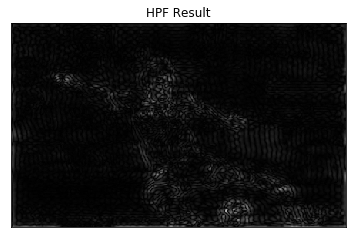

In [76]:
# Plot
plt.figure()
plt.imshow(img_hpf, cmap='gray')
plt.title('HPF Result')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../data/processed/2D/filtering/frequency/filtered/hpf_result_plot.png')

#### Low Pass Filter

In [77]:
# Applying Low Pass Filter

# Make a copy of zero-centered FFT
lpf_dfft= dfft_centered.copy()
# Create a mask the same size with FFT
lpf_mask= np.zeros(lpf_dfft.shape, dtype=np.uint8)
# Set 60x60 region to 1
lpf_mask[c_cords[0]-30:c_cords[0]+30, c_cords[1]-30:c_cords[1]+30]= 1
# Apply the mask
lpf_dfft= lpf_dfft*lpf_mask
# Reverse zero centrering
lpf_dfft= np.fft.ifftshift(lpf_dfft)
# Compute IFFT
img_lpf= cv2.idft(lpf_dfft)
# Obtain magnitude from complex numbers
img_lpf= cv2.magnitude(img_lpf[:,:,0], img_lpf[:,:,1])

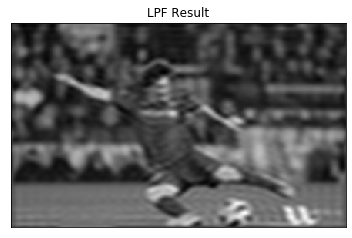

In [78]:
# Plot
plt.figure()
plt.imshow(img_lpf, cmap='gray')
plt.title('LPF Result')
plt.xticks([]), plt.yticks([])
# Save plot
plt.savefig('../data/processed/2D/filtering/frequency/filtered/lpf_result_plot.png')